In [112]:
import numpy as np
import math
from scipy.optimize import minimize
import Environment as Env
import matplotlib.pyplot as plt

# Initial parameters
P_max              = 0.00015   # Maximum transfer power of TX1 (watt)
TX1_Bandwidth      = 1e6       # TX1-RX1 Channel bandwidth (Hz)
RX1_Noise_Power    = 1e-13     # Power of noise in RX1 (watt)
Distance_TX1_RX1   = 100       # Distance between TX1 and RX1 (meter)
TX1_fading_samples = 1000      # Number of fading samples in the communication channel between TX1 and RX1
Lambda_a1          = 0.6 * 1e6 # Density of arrival data in TX1

ALPHA              = 1.5     # Path-loss exponent of communication and energy harvesting links

EH_eta             = 0.1     # Energy harvesting coefficient

B_max              = 3.6 * 1e6 # Maximum energy in the battery of TX2 in joules

EH_fading_samples  = 1000    # Number of fading samples in the energy harvesting channel between TX1 and TX2
Distance_TX1_TX2   = 10      # Distance between TX1 and TX2 (meter)

Distance_TX2_RX2   = 100     # Distance between TX2 and RX2 (meter)
TX2_fading_samples = 1000    # Number of fading samples in the communication channel between TX2 and RX2
RX2_Noise_Power    = 1e-13   # Noise power in RX2 (watt)
TX2_Bandwidth      = 1e6     # Bandwidth of the communication channel between TX2 and RX2 (Hz)
Lambda_a2          = 0.3 * 1e6 # Density of arrival data in TX2

beta               = 0.5     # Lyapunov parameter

T                  = 10000      # Number of communication rounds

# Initialize queues
Q1 = np.zeros(T + 1) # Data of TX1
Q2 = np.zeros(T + 1) # Data of TX2
B  = np.zeros(T + 1) # Battery of TX2

In [113]:
def objective_x1(x1):
    xi_1 = TX1_Bandwidth * np.log2(1 + x4 / RX1_Noise_Power)
    xi_2 = TX1_Bandwidth * np.log2(1 + B_max / RX1_Noise_Power)
    xi_3 = P_max * abs(x4)
    xi_4 = 2 * xi_2 * x3 + beta * abs(B_max)
    W = TX1_Bandwidth
    J = -2 * W**2 * x1**2 * (np.log2(1 + xi_1 * x4))**2 - 2 * W * a1_t * x1 * np.log2(1 + xi_1 * x4) - 2 * xi_2**2 * x3**2 - xi_4 * x3 - beta * x1 * x4
    return J

def objective_x2(x2):
    xi_1 = TX1_Bandwidth * np.log2(1 + x4 / RX1_Noise_Power)
    xi_2 = TX1_Bandwidth * np.log2(1 + B_max / RX1_Noise_Power)
    xi_3 = P_max * abs(x4)
    xi_4 = 2 * xi_2 * x3 + beta * abs(B_max)
    W = TX1_Bandwidth
    J = -2 * W**2 * x1**2 * (np.log2(1 + xi_1 * x4))**2 - 2 * W * a1_t * x1 * np.log2(1 + xi_1 * x4) - 2 * xi_2**2 * x3**2 - xi_4 * x3 - beta * x1 * x4
    return J

def objective_x3(x3):
    xi_1 = TX1_Bandwidth * np.log2(1 + x4 / RX1_Noise_Power)
    xi_2 = TX1_Bandwidth * np.log2(1 + B_max / RX1_Noise_Power)
    xi_3 = P_max * abs(x4)
    xi_4 = 2 * xi_2 * x3 + beta * abs(B_max)
    W = TX1_Bandwidth
    J = -2 * W**2 * x1**2 * (np.log2(1 + xi_1 * x4))**2 - 2 * W * a1_t * x1 * np.log2(1 + xi_1 * x4) - 2 * xi_2**2 * x3**2 - xi_4 * x3 - beta * x1 * x4
    return J

def objective_x4(x4):
    xi_1 = TX1_Bandwidth * np.log2(1 + x4 / RX1_Noise_Power)
    xi_2 = TX1_Bandwidth * np.log2(1 + B_max / RX1_Noise_Power)
    xi_3 = P_max * abs(x4)
    xi_4 = 2 * xi_2 * x3 + beta * abs(B_max)
    W = TX1_Bandwidth
    J = -2 * W**2 * x1**2 * (np.log2(1 + xi_1 * x4))**2 - 2 * W * a1_t * x1 * np.log2(1 + xi_1 * x4) - 2 * xi_2**2 * x3**2 - xi_4 * x3 - beta * x1 * x4
    return J

0.22062087510246783 0.3396895624487661 0.21984478122438303 0.00015


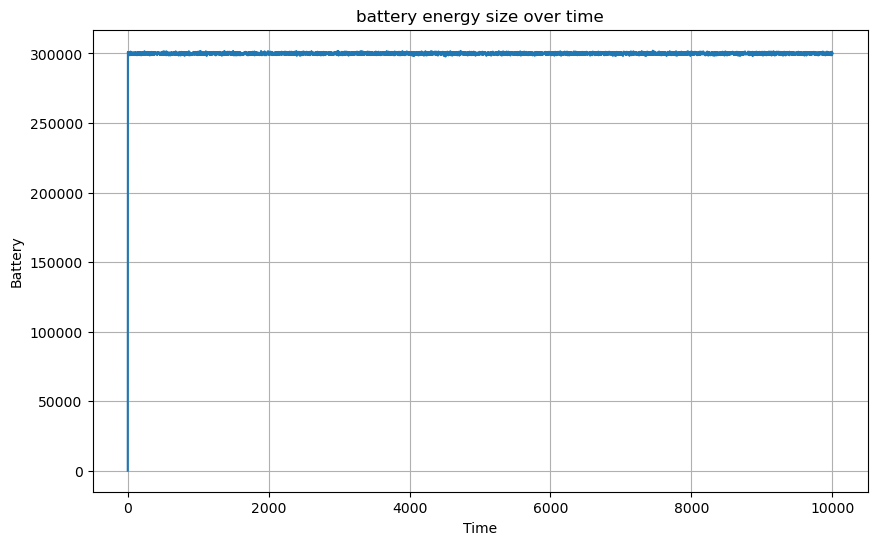

In [114]:
x2 = 0.1     # EH time
x3 = 0.1     # TX2 communication time
x4 = 0.00010 # TX1 transfer power

for t in range(T):
   
    a1_t = np.random.poisson(Lambda_a1)
    a2_t = np.random.poisson(Lambda_a2)
    # Define the constraint
    constraint = {'type': 'ineq', 'fun': lambda x1: 1 - x2 - x3 - x1}
    # Define the bounds for x1
    bounds = [(0, 1 - x2 - x3)]
    # Initial guess for x1
    x1_initial = 0.5 * (0 + (1 - x2 - x3))
    # Perform the optimization
    result = minimize(objective_x1, x1_initial, bounds=bounds, constraints=constraint)
    x1 = result.x[0]

    x3 = 0.1     # TX2 communication time
    x4 = 0.00010 # TX1 transfer power
    # Define the constraint
    constraint = {'type': 'ineq', 'fun': lambda x2: 1 - x2 - x3 - x1}
    # Define the bounds for x1
    bounds = [(0, 1 - x1 - x3)]
    # Initial guess for x1
    x2_initial = 0.5 * (0 + (1 - x1 - x3))
    # Perform the optimization
    result = minimize(objective_x2, x2_initial, bounds=bounds, constraints=constraint)
    x2 = result.x[0]


    x4 = 0.00010 # TX1 transfer power
    # Define the constraint
    constraint = {'type': 'ineq', 'fun': lambda x3: 1 - x2 - x3 - x1}
    # Define the bounds for x1
    bounds = [(0, 1 - x1 - x2)]
    # Initial guess for x1
    x3_initial = 0.5 * (0 + (1 - x1 - x2))
    # Perform the optimization
    result = minimize(objective_x3, x3_initial, bounds=bounds, constraints=constraint)
    x3 = result.x[0]


    bounds = [(0, P_max)]
    # Initial guess for x1
    x4_initial = 0.00005 
    # Perform the optimization
    result = minimize(objective_x4, x4_initial, bounds=bounds)
    x4 = result.x[0]


    # TX1 processing
    RX1_Power = Env.FadingChannel(x4, Distance_TX1_RX1, ALPHA, TX1_fading_samples)
    SNR_RX1, Rate_RX1, Data_TX1 = Env.calculate_transferred_data(RX1_Power, RX1_Noise_Power, TX1_Bandwidth, x1)
    Data_Transferred_TX1 = min(Data_TX1, Q1[t])
    Q1[t + 1] = Q1[t] - Data_Transferred_TX1 + a1_t
    
    # TX2 processing
    Harvested_power_TX2 = Env.calculate_harvested_power(x4, EH_eta, Distance_TX1_TX2, ALPHA, EH_fading_samples)
    Tx2_power = min(1000 / 3600, B[t] / x3)
    RX2_Power = Env.FadingChannel(Tx2_power, Distance_TX2_RX2, ALPHA, TX2_fading_samples)
    SNR_RX2, Rate_RX2, Data_TX2 = Env.calculate_transferred_data(RX2_Power, RX2_Noise_Power, TX2_Bandwidth, x3)
    Data_Transferred_TX2 = min(Data_TX2, Q2[t])
    Q2[t + 1] = Q2[t] - Data_Transferred_TX2 + a2_t
    Energy_consumption_TX2 = Tx2_power * x3
    B[t + 1] = B[t] - Energy_consumption_TX2 + (Harvested_power_TX2 * x2)
    B[t + 1] = min(B[t + 1], B_max)

print(x1, x2, x3, x4)

time = np.arange(T+1)

plt.figure(figsize=(10, 6))
plt.plot(time, Q2, label='Queue')
plt.xlabel('Time')
plt.ylabel('Battery')
plt.title('battery energy size over time')
plt.grid(True)
plt.show()

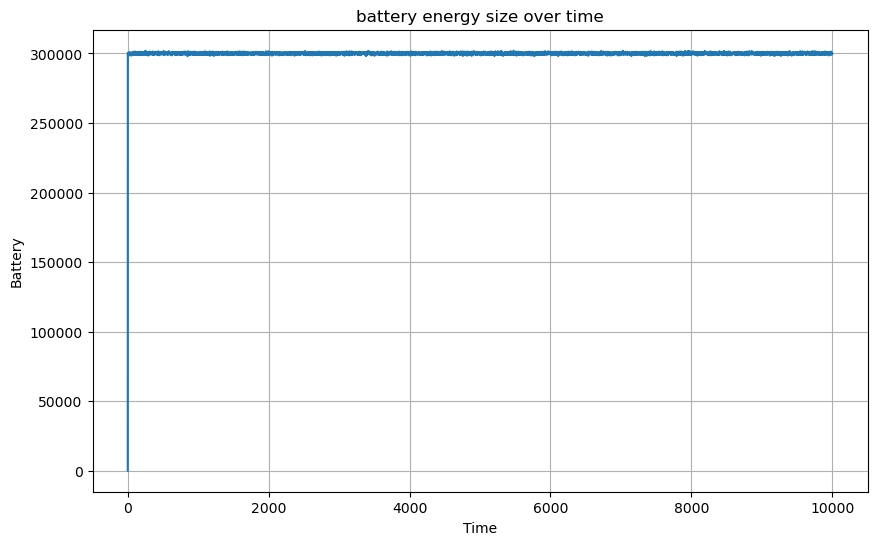